---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 3: Modelos climáticos simples </font>**
### **<font color="DodgerBlue"> Notebook 3: Ejercicios justos </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---
 
 ## **<font color="ForestGreen"> Modificando los forzamientos en FaIR </font>**
 
Este ejercicio utiliza los escenarios de CMIP, en particular el ssp370, en una versión más directa de la simulación con FaIR. Con respecto a la simulación del notebook anterior sólo vamos a modificar 3 cosas. 

1. La emisión de azufre será 0. 
2. Inserción de una erupción volcánica. 
3. Variabilidad solar modificada. 

Al final del ejercicio podremos contestar las siguientes preguntas.

1. ¿Qué efecto tiene el azufre en el clima? ¿Cuál es la razón de este impacto en el forzamiento y la temperatura?

2. ¿Qué tanto afecta una erupción volcánica fuerte al forzamiento radiativo? ¿Y qué tal a la temperatura promedio después de 3 años?

3. ¿Qué tan relevante es el forzamiento solar comparado al forzamiento por aerosoles o por GEIs? ¿Qué pasa si triplicamos la magnitud del forzamiento solar en un escenario? ¿Qué efectos espera en la temperatura? 
 
 
  ## **<font color="ForestGreen"> Ejercicio 1: forzamiento por aerosoles </font>**

 ### **<font color="ForestGreen"> Configuración de la simulación </font>**

In [1]:
pip install fair

Note: you may need to restart the kernel to use updated packages.


In [2]:
# celda pre-cargando todo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
from fair import FAIR
from fair.io import read_properties
from fair.interface import fill, initialise
from fair.earth_params import seconds_per_year
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

En este notebook ya no explicaremos cada paso, sólo daremos las instrucciones necesarias para correr el modelo las veces que sean necesarias. Lo haremos para la simulación que llamaremos _Control_ que utiliza la clase `f` y la clase `f2` que será a la que le quitaremos las emisiones de azufre.

Recuerden que el orden de las siguientes instrucciones importante. 

## **<font color="ForestGreen"> Paso 1: Iniciar la clase </font>**

In [3]:
# Esta es la simulacion control
f = FAIR()
# Esta será la simulacion sin azufre.
f2 = FAIR()

## **<font color="ForestGreen"> Paso 2 Tiempo de simulacion </font>**

En este caso los escenarios están definidos de 1750 a 2100

In [4]:
f.define_time(1750, 2100, 1)
f2.define_time(1750, 2100, 1)

## **<font color="ForestGreen"> Paso 3: definir los escenarios </font>**

Aquí empiezan a resaltar las diferencias con el notebook anterior. Específicamente, vamos a utilizar sólo el escenario pre-establecido "ssp370".

Tomaremos los SSPs que se utilizaron en el proyecto CMIP, por lo que tenemos que utilizar los mismos nombres. 


In [5]:
# Definir lista de escenarios
scenarios = [ 'ssp370']
# Meterlos a la clase de Fair
f.define_scenarios(scenarios)
f2.define_scenarios(scenarios)

## **<font color="ForestGreen"> Paso 4 y 5: definir las configuraciones y especies </font>**

Por simplicidad, vamos a sólo utilizar un modelo aquí. El modelo británico HadGEM https://www.metoffice.gov.uk/research/approach/modelling-systems/unified-model/climate-models/hadgem3. 
Las propiedades de las especies las obtenemos directamente de FaIR.

In [6]:
species, properties = read_properties()
f.define_species(species, properties)
f2.define_species(species, properties)

In [7]:
# Cargamos datos existentes ya en el paquete, para eso tenemos que saber donde esta el paquete fair en nuestro OS
df = pd.read_csv("4xCO2_cummins_ebm3.csv")
models = ['HadGEM3-GC31-MM']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")
# definir configuraciones 2 veces
f.define_configs(configs)
f2.define_configs(configs)

## **<font color="ForestGreen"> Paso 6: Generar los datos de input y output </font>**


In [8]:
f.allocate()
f2.allocate()

## **<font color="ForestGreen"> Paso 7: rellenando los datos </font>**

In [9]:
# rellenando configuraciones de especies
f.fill_species_configs()
f2.fill_species_configs() #rellenar las configuraciones de las especies químicas
# rellenando escenarios
f.fill_from_rcmip() #rcmip lee que escenario se está usando, lee las series de tiempo y las rellena en emission
f2.fill_from_rcmip()


<div class="alert alert-block alert-info">
<b>Nota:</b> 
Una vez que ya rellenamos todos los arrays con las emisiones y concentraciones por default de CMIP6, para el escenario ssp370, podemos modificar una cosa. 

Aquí es donde volvemos 0 las emisiones de azufre. Noten que sólo lo hacemos para `f2`. 
</div>



In [10]:
print(f.emissions.loc[dict(specie='Sulfur')])
# modificamos las emisiones de f2
f2.emissions.loc[dict(specie=['Sulfur'])]=0.0
print(f2.emissions.loc[dict(specie='Sulfur')])

<xarray.DataArray (timepoints: 350, scenario: 1, config: 1)> Size: 3kB
array([[[  2.44004843]],

       [[  2.40837914]],

       [[  2.39711604]],

       [[  2.41069336]],

       [[  2.46206525]],

       [[  2.44235514]],

       [[  2.41918432]],

       [[  2.50746469]],

       [[  2.47974383]],

       [[  2.47352803]],

...

       [[ 83.61622914]],

       [[ 83.06934404]],

       [[ 82.52245895]],

       [[ 81.97557385]],

       [[ 81.42868875]],

       [[ 80.88180365]],

       [[ 80.33491855]],

       [[ 79.78803346]],

       [[ 79.24114836]],

       [[ 78.69426326]]])
Coordinates:
  * timepoints  (timepoints) float64 3kB 1.75e+03 1.752e+03 ... 2.1e+03
  * scenario    (scenario) <U6 24B 'ssp370'
  * config      (config) <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
    specie      <U43 172B 'Sulfur'
<xarray.DataArray (timepoints: 350, scenario: 1, config: 1)> Size: 3kB
array([[[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]

Lo imprimimos arriba para ver cómo son diferentes los arrays. 

El  resto de la configuración es igual para cada simulación.

## **<font color="ForestGreen"> Paso 7: rellenando los datos </font>**

In [11]:
#estamos diciendo q el forzamiento original sea 0, igual la anomalía de temp, etc etc
initialise(f.concentration, f.species_configs['baseline_concentration']) #las concentraciones antes del humano, las basales pues
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

In [12]:
initialise(f2.concentration, f2.species_configs['baseline_concentration'])
initialise(f2.forcing, 0)
initialise(f2.temperature, 0)
initialise(f2.cumulative_emissions, 0)
initialise(f2.airborne_emissions, 0)

In [13]:
df

,model,run,conv,nit,gamma,C1,C2,C3,kappa1,kappa2,kappa3,epsilon,sigma_eta,sigma_xi,F_4xCO2
0,CAMS-CSM1-0,r1i1p1f1,True,4809,28.239872,2.632439,9.262195,52.927697,1.876254,5.153591,0.643546,1.285458,2.690512,0.439493,8.870602
1,GISS-E2-2-G,r1i1p1f1,True,3965,2.385368,3.601142,11.333337,313.520678,1.972359,1.922481,0.631276,0.443575,0.544189,0.535407,8.035197
2,NorESM2-LM,r1i1p1f1,True,1966,1.633858,4.487727,125.070697,0.041775,1.603670,0.823165,1.596259,0.836880,1.343506,0.698845,7.845990
3,ACCESS-ESM1-5,r1i1p1f1,True,3517,2.742392,3.767727,8.922353,87.066320,0.699550,3.583351,0.842623,1.557784,0.636709,0.604740,6.557606
4,HadGEM3-GC31-LL,r1i1p1f3,True,5953,3.129576,3.868931,9.254582,66.399919,0.611179,2.851391,0.642237,1.174268,0.457505,0.611576,7.222087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,TaiESM1,r1i1p1f1,True,6231,2.044911,5.064045,8.999461,91.069184,0.873504,2.314369,0.919607,1.233673,0.461613,0.687217,8.150058
62,NorESM2-MM,r1i1p1f1,True,2562,1.480571,4.121854,121.675907,0.049259,1.961781,0.788035,2.112814,0.528932,1.310908,0.661117,9.113671
63,HadGEM3-GC31-MM,r1i1p1f3,True,4790,3.131744,3.396641,14.143754,64.570893,0.646049,2.007478,0.693694,1.041912,0.497626,0.433937,7.159394
64,NESM3,r1i1p1f1,True,4634,2.798083,2.492649,19.210731,125.556294,0.964647,1.051545,0.478707,0.724899,0.546573,0.272723,8.151686


In [14]:
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)
    fill(f2.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f2.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f2.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

## <font color="ForestGreen">Paso 8. Correr FaIR  </font>

In [15]:
f2.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

In [16]:
f.run()


Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

## <font color="ForestGreen"> Paso 10 Análisis  </font>

El primer análisis que podría ser importante es sobre el forzamiento. Recuerden que el forzamiento en este modelo existe en diferentes atributos como `f.forcing_sum` o `f.forcing`.

In [17]:
f.forcing

<xarray.DataArray (timebounds: 351, scenario: 1, config: 1, specie: 64)> Size: 180kB
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       [[[            nan,             nan,  6.36268881e-04, ...,
           3.74587692e-04, -8.54586068e-05,             nan]]],


       [[[            nan,             nan,  1.16182296e-03, ...,
           7.02838663e-04, -1.72489406e-04,             nan]]],


       ...,


       [[[            nan,             nan,  6.87233629e+00, ...,
           7.86776001e-02, -2.69182767e-01,             nan]]],


       [[[            nan,             nan,  6.93604525e+00, ...,
           7.89133346e-02, -2.69940605e-01,             nan]]],


       [[[            nan,             nan,  6.99979115e+00, ...,
           7.91469588e-02, -2.70701062e-01,             nan]]]])
Coordinates:
  * timebounds  (timebounds) float64 3kB 1.75e+03 1.751e+03 ... 2.1e+03
  * scenario    (scenario) <U6 24B 'ssp370'
  * config      (config) <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
  * specie      (specie) <U43 11kB 'CO2 FFI' ... 'Equivalent effective strato...

In [18]:
f.forcing.specie

<xarray.DataArray 'specie' (specie: 64)> Size: 11kB
array(['CO2 FFI', 'CO2 AFOLU', 'CO2', 'CH4', 'N2O', 'Sulfur', 'BC', 'OC',
       'NH3', 'NOx', 'VOC', 'CO', 'CFC-11', 'CFC-12', 'CFC-113', 'CFC-114',
       'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b', 'CCl4', 'CHCl3',
       'CH2Cl2', 'CH3Cl', 'CH3CCl3', 'CH3Br', 'Halon-1202', 'Halon-1211',
       'Halon-1301', 'Halon-2402', 'CF4', 'C2F6', 'C3F8', 'c-C4F8', 'C4F10',
       'C5F12', 'C6F14', 'C7F16', 'C8F18', 'NF3', 'SF6', 'SO2F2', 'HFC-125',
       'HFC-134a', 'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-23', 'HFC-236fa',
       'HFC-245fa', 'HFC-32', 'HFC-365mfc', 'HFC-4310mee', 'NOx aviation',
       'Solar', 'Volcanic', 'Aerosol-radiation interactions',
       'Aerosol-cloud interactions', 'Ozone', 'Contrails',
       'Light absorbing particles on snow and ice',
       'Stratospheric water vapour', 'Land use',
       'Equivalent effective stratospheric chlorine'], dtype='<U43')
Coordinates:
  * specie   (specie) <U43 11kB 'CO2 FFI' ... 'Equivalent effective stratosph...

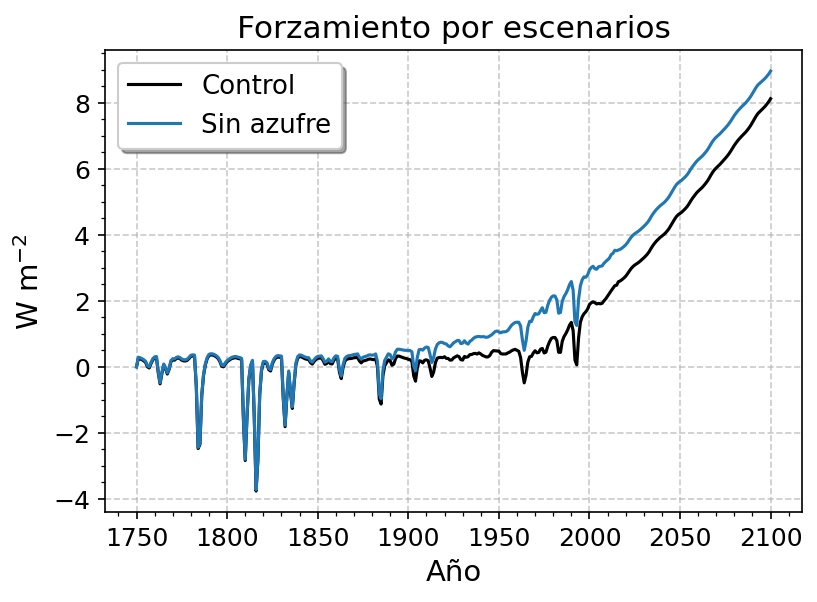

In [19]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.forcing_sum.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3')], label='Control',c='k');
plt.plot(f2.timebounds, f2.forcing_sum.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3')], label='Sin azufre');
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento por escenarios',legend=True)
#sin azufre hay más forzamiento radiativo

Vemos que las emisiones por azufre empiezan a tener un impacto marcado a partir de 1900, donde la curva Control tiene un menor forzamiento que la que no tiene azufre. Veamos ahora qué pasó con la temperatura.

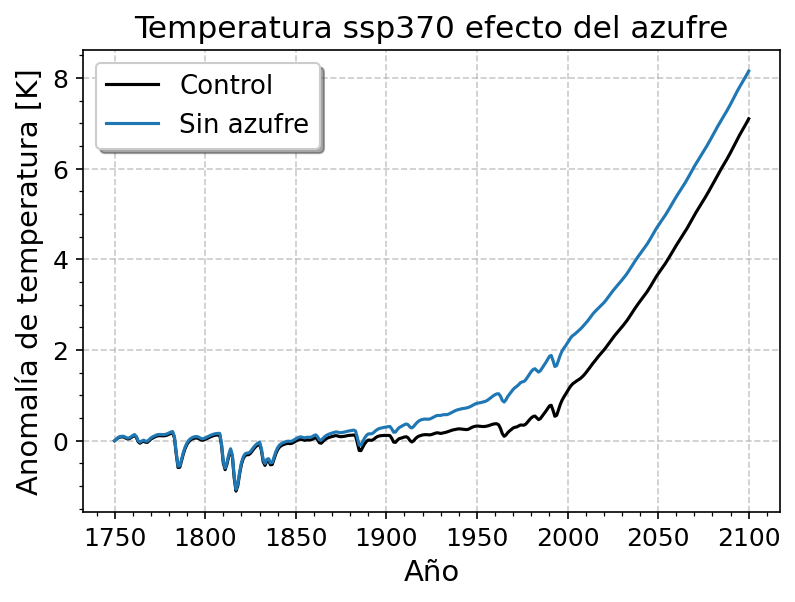

In [20]:
model_name='HadGEM3-GC31-MM_r1i1p1f3'
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.temperature.loc[dict(config=model_name,layer=0)], label='Control',c='k');
plt.plot(f2.timebounds, f2.temperature.loc[dict(config=model_name,layer=0)], label='Sin azufre');
lineplot_setup(None,None,'Año','Anomalía de temperatura [K]',title='Temperatura ssp370 efecto del azufre',legend=True)


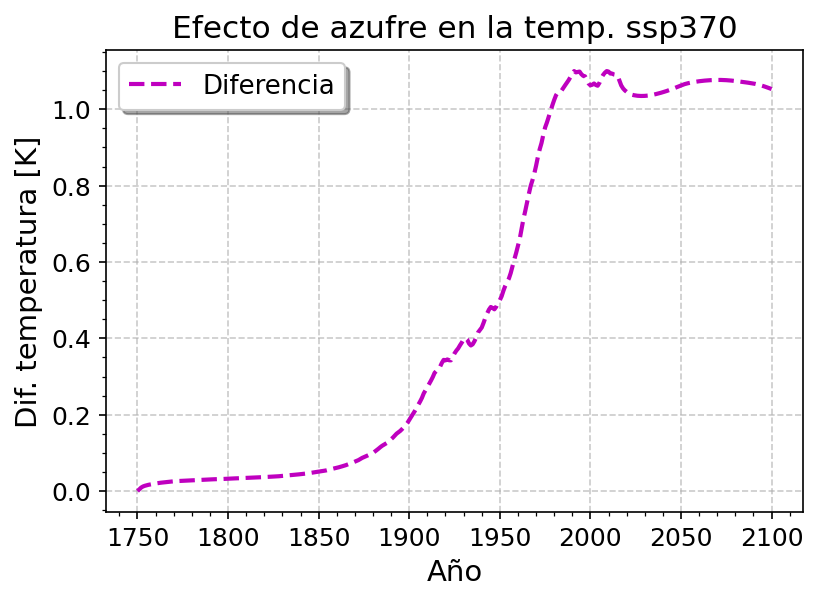

In [21]:
#ver la diferencia 
model_name='HadGEM3-GC31-MM_r1i1p1f3'
temp_exo_contr = f.temperature.loc[dict(config=model_name,layer=0)]
temp_exp1 = f2.temperature.loc[dict(config=model_name,layer=0)]
dif = temp_exp1 -temp_exo_contr 

plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, dif, label='Diferencia',c='m', linewidth = 2, linestyle='--');
lineplot_setup(None,None,'Año','Dif. temperatura [K]',title='Efecto de azufre en la temp. ssp370',legend=True)


## **<font color="Orange">  Inspeccionando un poco más </font>**

El número de "botones" en FaIR es algo complicado porque quiere decir que no es trivial atribuir los resultados de temperatura a un sólo proceso. Pero si uno entiende un poco sobre los objetos en FaIR que tenemos a nuestra disposición podemos investigar un poco más sobre el modelo. Por ejemplo, existen 2 objetos asociados al forzamiento: 

1. forcing_sum: forzamiento total, producto de la suma de todos los forzamientos individuales. 
2. forcing: forzamiento por especie. 

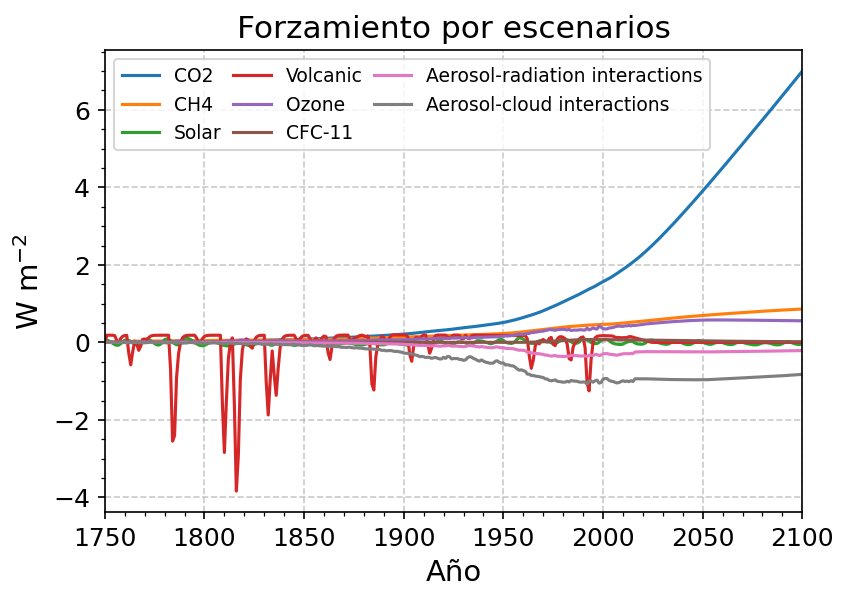

In [22]:
plt.figure(figsize=(6,4),dpi=150)
for specie in ['CO2','CH4','Solar','Volcanic','Ozone','CFC-11','Aerosol-radiation interactions','Aerosol-cloud interactions']:
    if f.forcing.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3',scenario='ssp370',specie=specie)].all().isnull():
        continue
    else:
        plt.plot(f.timebounds, f.forcing.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3',scenario='ssp370',specie=specie)], label=specie);
lineplot_setup(1750,2100,'Año','W m$^{-2}$',title='Forzamiento por escenarios',legend=False)
plt.legend(fontsize=9,ncol=3,columnspacing=0.6)

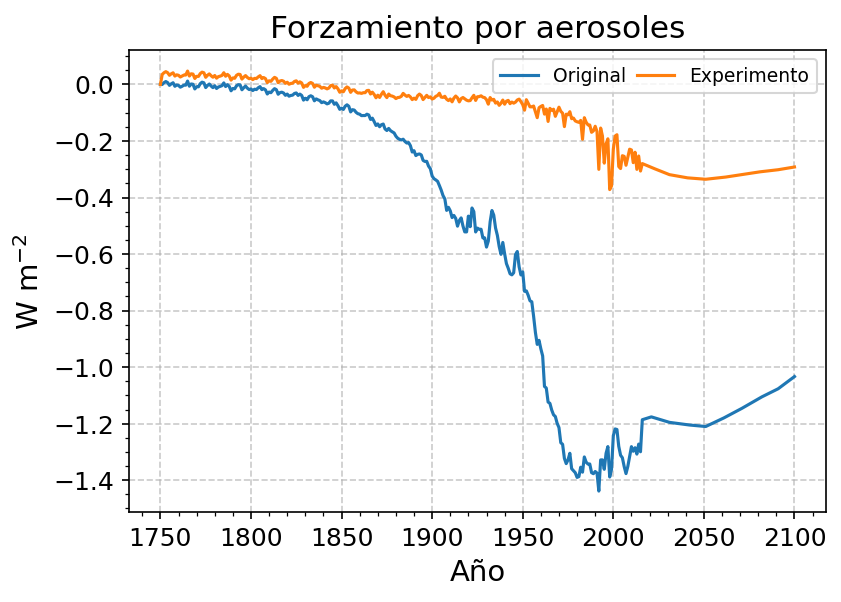

In [23]:
plt.figure(figsize=(6,4),dpi=150)
aerosol_forcing=['Aerosol-radiation interactions','Aerosol-cloud interactions'] #efecto de esos aerosoles en el forzamiento
orig_f=f.forcing.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3',scenario='ssp370',specie=aerosol_forcing)]
exp_f=f2.forcing.loc[dict(config='HadGEM3-GC31-MM_r1i1p1f3',scenario='ssp370',specie=aerosol_forcing)]

orig_f_sum=orig_f.sum('specie') #sumamos el forzamiento aerosol-nube + forzamiento radiación-aerosol
exp_f=exp_f.sum('specie')

plt.plot(f.timebounds, orig_f_sum, label='Original');
plt.plot(f2.timebounds, exp_f, label='Experimento');
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento por aerosoles',legend=False)
plt.legend(fontsize=9,ncol=3,columnspacing=0.6)

#forzamiento negativo enfría el clima
#el original es más frío
#los aerosoloes rebotan la radiación y enfrían el clima

Ahora tenemos información casi suficiente para responder la primer ronda de preguntas:
    
   1. ¿Qué efecto tiene el azufre en el clima? ¿Cuál es la razón de este impacto en el forzamiento y la temperatura?
   
   R= Uno de los principales efectos de las emisiones de azufre son las emisiones de dióxido de azufre (SO$_2$), que es un subproducto de la quema de combustibles fósiles, especialmente carbón y petróleo. Cuando el SO$_2$ se emite a la atmósfera, puede reaccionar con otros compuestos y formar aerosoles de sulfato, que son partículas microscópicas suspendidas en el aire. Estas emisiones tienden a formar aerosoles que terminan teniendo un rol de enfriamiento al reflejar la radiación solar de vuelta al espacio.  Por otro lado, los aerosoles de sulfato también pueden afectar a las nubes al actuar como núcleos de condensación, lo que puede influir en la cantidad y el tipo de nubes que se forman. 
   
  Con respecto al ejercicio, vemos que la emisión de azufre enfría el clima, porque la simulación control tiene menor forzamiento positivo que la simulación sin azufre podemos inferir que entonces el azufre tenía un forzamiento negativo. Por esta razón la anomalía de temperatura finales de siglo es mayor cuando removemos el azufre, ya que estamos quitando un forzamiento que actúa en contra del efecto de los gases de efecto invernadero. 
   La razón de fondo es que las emisiones de SO2 tienen un efecto profundamente negativo en el forzamiento radiativo ya que reflejan directamente la radiación solar, impidiendo que llegue a la superficie, pero también porque fungen como núcleos de condensación de nube, lo que también aumenta el albedo planetario y enfría la superficie. FaIR nos ha permitido constatar eso. 

  ## **<font color="ForestGreen"> Ejercicio 2: Erupción volcánica </font>**
  
Ahora cambiaremos ligeramente de tema al tratar el tema de los **forzamientos naturales** como lo pueden ser los forzamientos volcánicos.
  
  Históricamente, sabemos que las erupciones volcánicas enfrían el clima. Esto se debe a que durante una erupción volcánica, se emiten gases como dióxido de azufre (SO$_2$), dióxido de carbono (CO$_2$), vapor de agua y otros compuestos volátiles. Además, se liberan grandes cantidades de ceniza y partículas finas en la atmósfera.
  
 El SO$_2$ liberado durante una erupción volcánica puede reaccionar con el oxígeno y el agua en la atmósfera para formar aerosoles de sulfato. Estos aerosoles actúan como pequeñas partículas reflectantes que dispersan la luz solar, lo que resulta en un enfriamiento de la atmósfera al bloquear parte de la radiación solar entrante.
 
 ### Preguntas del ejercicio

1. ¿Cuál es el impacto de una erupción volcánica extrema sobre el clima?
2. ¿Qué tanto afecta una erupción volcánica fuerte al forzamiento radiativo? ¿Y qué tal a la temperatura promedio después de 3 años?
3. ¿Cuánto tiempo dura el impacto climático de una erupción volcánica?
  
 ### Solución
  
Para responder a la pregunta, el planteamiento será el siguiente:

1. Representar una emisión volcánica a través de una modificación del forzamiento "Volcanic". 
2. Insertar una "erupción en el año 2024" de tamaño mayor a cualquier otra erupción vista.

 ### Simulación

  En la siguiente celda, hacemos los pasos 1 al 5.

In [24]:
# paso 1
f3 = FAIR()
# paso 2
f3.define_time(1750, 2100, 1)
# paso 3
f3.define_scenarios(scenarios)
# paso 4 y 5
f3.define_species(species, properties)
f3.define_configs(configs)

Los pasos 6 y 7 también son como en ejercicios anteriores, entonces podemos sólo escribir:

In [25]:
# paso 6 
f3.allocate()
# paso 7
f3.fill_species_configs()
f3.fill_from_rcmip()


Ahora aquí es donde queremos modificar al forzamiento, específicamente al forzamiento correspondiente a "Volcanic". 
Para recordarnos las especies que están incluidas en forzamiento puede ser útil imprimir este objeto. 

In [26]:
f3.forcing.specie

<xarray.DataArray 'specie' (specie: 64)> Size: 11kB
array(['CO2 FFI', 'CO2 AFOLU', 'CO2', 'CH4', 'N2O', 'Sulfur', 'BC', 'OC',
       'NH3', 'NOx', 'VOC', 'CO', 'CFC-11', 'CFC-12', 'CFC-113', 'CFC-114',
       'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b', 'CCl4', 'CHCl3',
       'CH2Cl2', 'CH3Cl', 'CH3CCl3', 'CH3Br', 'Halon-1202', 'Halon-1211',
       'Halon-1301', 'Halon-2402', 'CF4', 'C2F6', 'C3F8', 'c-C4F8', 'C4F10',
       'C5F12', 'C6F14', 'C7F16', 'C8F18', 'NF3', 'SF6', 'SO2F2', 'HFC-125',
       'HFC-134a', 'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-23', 'HFC-236fa',
       'HFC-245fa', 'HFC-32', 'HFC-365mfc', 'HFC-4310mee', 'NOx aviation',
       'Solar', 'Volcanic', 'Aerosol-radiation interactions',
       'Aerosol-cloud interactions', 'Ozone', 'Contrails',
       'Light absorbing particles on snow and ice',
       'Stratospheric water vapour', 'Land use',
       'Equivalent effective stratospheric chlorine'], dtype='<U43')
Coordinates:
  * specie   (specie) <U43 11kB 'CO2 FFI' ... 'Equivalent effective stratosph...

Vemos que efectivamente hay un forzamiento que se llama "Volcanic", vamos a modificarlo. 

En nuestro caso vamos a poner una erupción volcánica en el año 1982, el año en el que nació el profesor. Antes de modificar el forzamiento vamos a hacer una grafiquita rápida utilizando el experimento _Control_ para ver de qué tamaño es la unidad del forzamiento volcánico y cómo se ve su evolución en el tiempo.


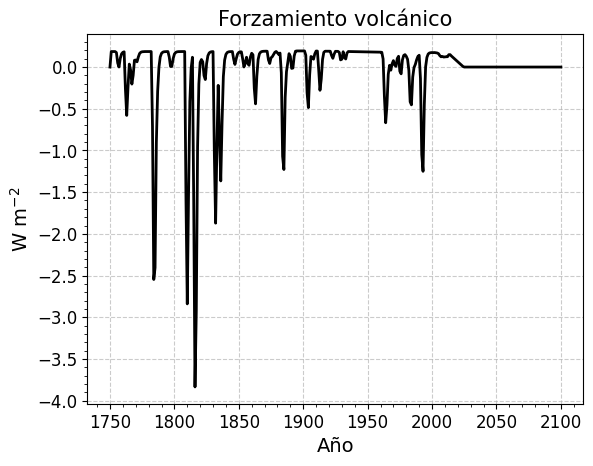

In [27]:
plt.plot(f.timebounds,f.forcing.loc[dict(specie='Volcanic',config=model_name)].squeeze(),label='Control',linestyle='-',c='k',linewidth=2)
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento volcánico',legend=False)

La gráfica muestra que el forzamiento volcánico llega a tener valores de casi -4.0 W m$^{-2}$ por lo que una erupción fuerte podría ser de este tamaño o quizás mayor. 

De esta manera, vamos a generar una erupción como nunca antes vista con un forzamiento de -5.0 W m$^{-2}$.

In [28]:
# -4 parece ser suficientemente fuerte.
f3.forcing.loc[dict(specie='Volcanic',timebounds=2024)]=-5

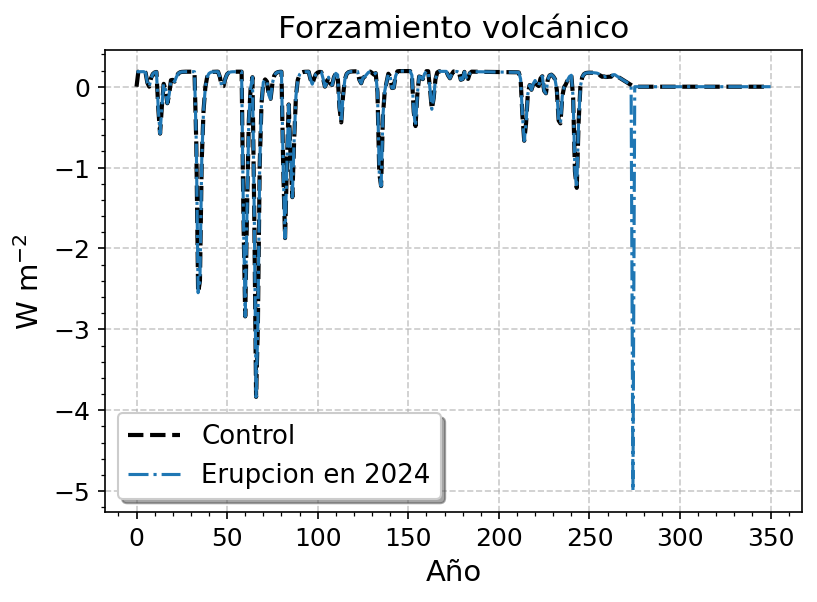

In [29]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.forcing.loc[dict(specie='Volcanic',config=model_name)].squeeze(),label='Control',linestyle='--',c='k',linewidth=2)
plt.plot(f3.forcing.loc[dict(specie='Volcanic',config=model_name)].squeeze(),label='Erupcion en 2024',linestyle='-.')
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento volcánico',legend=True)

Ahora regresamos a configurar la simulación de `f3`. Las siguientes dos celdas representan el **paso 8**.
Noten que no hemos hecho nada diferente comparado con la simulación original salvo en el paso anterior. 

In [30]:
# paso 8a
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f3.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f3.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f3.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [31]:
# paso 8b
initialise(f3.concentration, f3.species_configs['baseline_concentration'])
initialise(f3.forcing, 0)
initialise(f3.temperature, 0)
initialise(f3.cumulative_emissions, 0)
initialise(f3.airborne_emissions, 0)

Finalmente el **paso 9**. 

In [32]:
f3.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

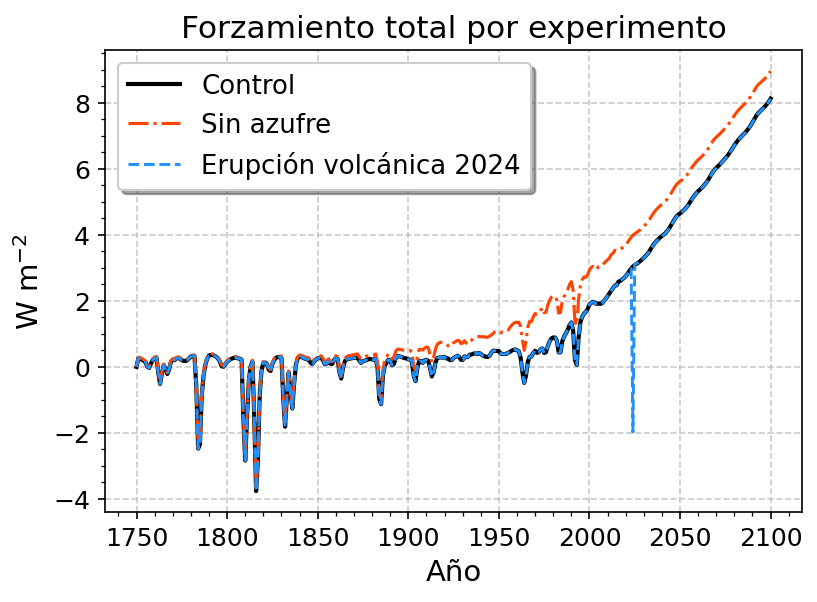

In [33]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.forcing_sum.loc[dict(config=model_name)], label='Control',linestyle='-',c='k',linewidth=2);
plt.plot(f2.timebounds, f2.forcing_sum.loc[dict(config=model_name)], label='Sin azufre',linestyle='-.',c='orangered');
plt.plot(f3.timebounds, f3.forcing_sum.loc[dict(config=model_name)], label='Erupción volcánica 2024',linestyle='--',linewidth=1.4,c='dodgerblue');
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento total por experimento',legend=True)

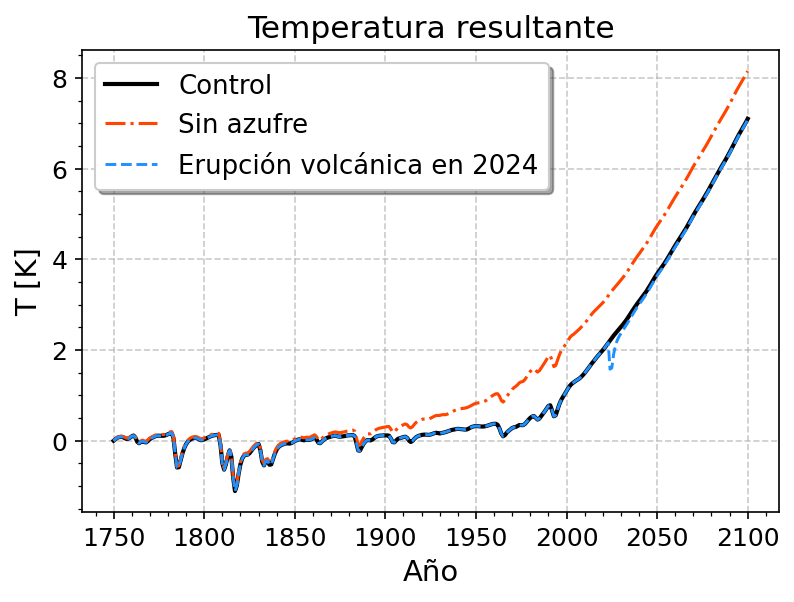

In [34]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.temperature.loc[dict(config=model_name,layer=0)], label='Control',linestyle='-',c='k',linewidth=2);
plt.plot(f2.timebounds, f2.temperature.loc[dict(config=model_name,layer=0)], label='Sin azufre',linestyle='-.',c='orangered');
plt.plot(f3.timebounds, f3.temperature.loc[dict(config=model_name,layer=0)], label='Erupción volcánica en 2024',linestyle='--',linewidth=1.4,c='dodgerblue');
lineplot_setup(None,None,'Año','T [K]',title='Temperatura resultante',legend=True)

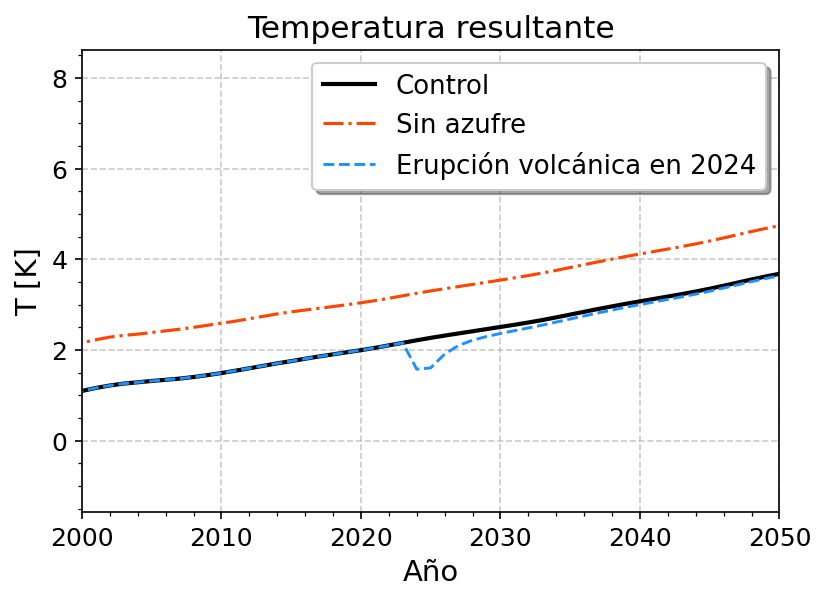

In [35]:
# zooom a la grafica de T
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.temperature.loc[dict(config=model_name,layer=0)], label='Control',linestyle='-',c='k',linewidth=2);
plt.plot(f2.timebounds, f2.temperature.loc[dict(config=model_name,layer=0)], label='Sin azufre',linestyle='-.',c='orangered');
plt.plot(f3.timebounds, f3.temperature.loc[dict(config=model_name,layer=0)], label='Erupción volcánica en 2024',linestyle='--',linewidth=1.4,c='dodgerblue');
lineplot_setup(2000,2050,'Año','T [K]',title='Temperatura resultante',legend=True)

Habiendo terminado esta simulación y sus gráficas podemos contestar la pregunta del ejercicio. 

1. ¿Cuál es el impacto de una erupción volcánica extrema sobre el clima?

El experimento realizado demuestra que la erupción volcánica insertada tiene un efecto de **enfriar** el clima, ya que vemos una disminución en la temperatura en este experimento en 2024 comparado al experimento control. Sin embargo, en la gráfica de temperatura vemos que dicha disminución solo dura unos cuantos años. Es un forzamiento puntual y de corta duración pero que puede causar impactos regionales profundos que luego afectan a su vez dinámicas regionales y teleconexiones. 

- Driscoll, Simon, et al. "Coupled Model Intercomparison Project 5 (CMIP5) simulations of climate following volcanic eruptions." Journal of Geophysical Research: Atmospheres 117.D17 (2012). https://doi.org/10.1029/2012JD017607

2. ¿Qué tanto afecta una erupción volcánica fuerte al forzamiento radiativo? 


 Pusimos una erupción tan fuerte como cualquier otra en el registro histórico en 2024. Esto afectó fuertemente el forzamiento radiativo, volviéndolo negativo para ese año. Sin embargo, para el año 2026, ya no había vestigio alguno de la erupción en la serie de tiempo del forzamiento, ya que las curvas de _Control_ y con erupción son exactamente iguales. Esto quiere decir que una erupción volcánica provoca un forzamiento negativo fuerte pero de corta duración.

3. ¿Cuánto tiempo dura el impacto climático de una erupción volcánica? ¿Cómo es el impacto de este experimento sobre la temperatura promedio después de 3 años?

En el caso de la temperatura, sí podemos observar una ligera disminución de la temperatura, de aproximadamente 0.25 grados Celsius con respecto a la curva _Control_ para el año 2024, pero esta diferencia desaparece también rápidamente, para el año 2030, esta diferencia es muy pequeña. Para 2024, prácticamente ya no hay diferencias entre ambas curvas. Esto se debe a que el forzamiento por volcanes es puntual, y no tiene un impacto de gran duración en escalas climáticas. Físicamente, los aerosoles, a diferencia del CO2, no duran tanto tiempo en la atmósfera. En nuestro modelo, nuestra modificación del forzamiento fue puntual por lo que este forzamiento es rápidamente asimilado por el sistema climático de FaIR, en este caso el océano.

## **<font color="ForestGreen"> Ejercicio 3: el forzamiento solar </font>**

Este ejercicio final buscará entender el rol del forzamiento solar sobre el clima. Las preguntas guía de investigación son:

1. ¿Qué tan relevante es el forzamiento solar comparado al forzamiento por aerosoles o por GEIs? ¿Qué pasa si triplicamos la magnitud del forzamiento solar en un escenario? ¿Qué efectos espera en la temperatura?

Empezamos una nueva simulación desde 0.

In [36]:
# pasos 1 al 7
f4 = FAIR()
f4.define_time(1750, 2100, 1)
f4.define_scenarios(scenarios)
f4.define_species(species, properties)
f4.define_configs(configs)
f4.allocate()
f4.fill_species_configs()
f4.fill_from_rcmip()

Ahora sí, vamos a ver cómo es el forzamiento solar y a modificarlo. 
También vamos a sacar su desviación estándar para ver cuánto varía. Recuerden que el forzamiento siempre está en $W m^{-2}$. 

In [37]:
f4.forcing.loc[dict(specie='Solar')]

<xarray.DataArray (timebounds: 351, scenario: 1, config: 1)> Size: 3kB
array([[[ 8.27945382e-02]],

       [[ 6.44482492e-02]],

       [[ 4.02361398e-02]],

       [[ 7.10829555e-03]],

       [[-2.81880301e-02]],

       [[-5.76341361e-02]],

       [[-7.36637381e-02]],

       [[-6.78837211e-02]],

       [[-3.26341971e-02]],

       [[ 1.82939157e-02]],

...

       [[-7.14803278e-03]],

       [[ 1.63177546e-02]],

       [[ 2.40958648e-02]],

       [[ 7.48170519e-03]],

       [[-1.24894811e-02]],

       [[-3.16586965e-02]],

       [[-4.55175305e-02]],

       [[-5.23229700e-02]],

       [[-5.08477744e-02]],

       [[-3.51423226e-02]]])
Coordinates:
  * timebounds  (timebounds) float64 3kB 1.75e+03 1.751e+03 ... 2.1e+03
  * scenario    (scenario) <U6 24B 'ssp370'
  * config      (config) <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
    specie      <U43 172B 'Solar'

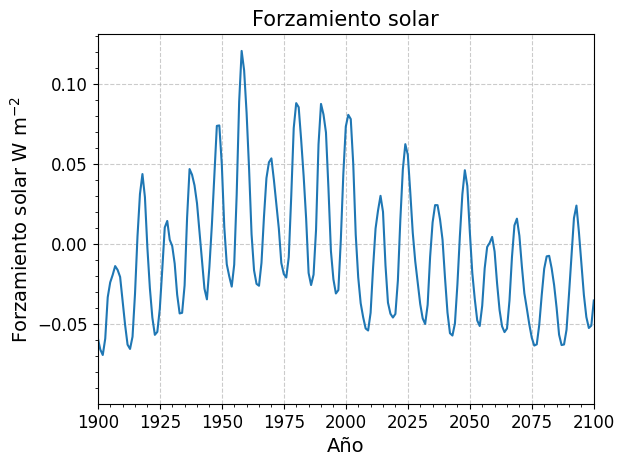

In [38]:
plt.plot(f4.timebounds,f4.forcing.loc[dict(specie='Solar')].squeeze())
lineplot_setup(1900,2100,'Año','Forzamiento solar W m$^{-2}$',title='Forzamiento solar',legend=False)


Ahora que hemos hecho una gráfica vemos que las estimaciones del IPCC sobre el forzamiento solar son relativamente pequeñas. Vamos a ver si podemos aumentar la variabilidad de este forzamiento. Para eso primero medimos la variabilidad con el estadístico de desviación estándar para este objeto.

In [39]:
std=f4.forcing.loc[dict(specie='Solar')].squeeze().std() #squeeze elimina la config y la specie en las dimensiones,en general entradas que solo valgan 1 
print(std)

<xarray.DataArray ()> Size: 8B
array(0.04450445)
Coordinates:
    scenario  <U6 24B 'ssp370'
    config    <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
    specie    <U43 172B 'Solar'


Ahora vamos a triplicar el forzmiento solar, para eso primero guardamos el original en otra variable y luego reemplazamos el valor del forzamiento solar por el original multiplicado por 3. 

In [40]:
orig_forcing = copy.deepcopy(f4.forcing.loc[dict(specie='Solar')]) #copy permite hacer copias del proyecto
f4.forcing.loc[dict(specie='Solar')]=orig_forcing*3 #se sobreescribe 

Para ver las diferencias, los graficamos. Luego, lo demás es igual a la simulación control.

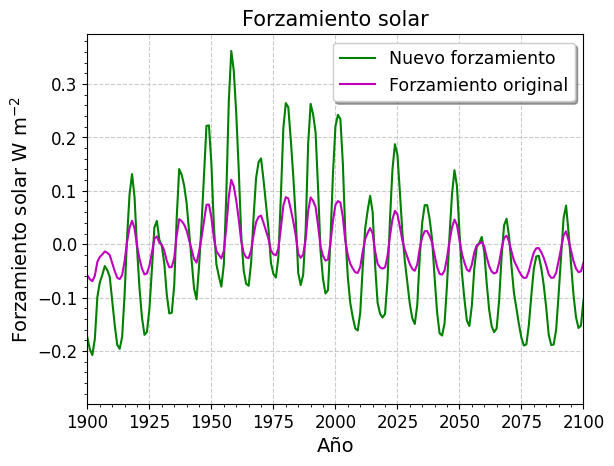

In [41]:
plt.plot(f4.timebounds,f4.forcing.loc[dict(specie='Solar')].squeeze(),c='green',label='Nuevo forzamiento')
plt.plot(f4.timebounds,orig_forcing.squeeze(),c='m',label='Forzamiento original')
lineplot_setup(1900,2100,'Año','Forzamiento solar W m$^{-2}$',title='Forzamiento solar',legend=True)

Una vez que hemos modificado `f4`, podemos terminar de configurar la simulación. 

In [42]:
# paso 8
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f4.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f4.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f4.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [43]:
# paso 9
initialise(f4.concentration, f4.species_configs['baseline_concentration'])
initialise(f4.forcing, 0)
initialise(f4.temperature, 0)
initialise(f4.cumulative_emissions, 0)
initialise(f4.airborne_emissions, 0)

In [44]:
print(f4.configs)

['HadGEM3-GC31-MM_r1i1p1f3']


In [45]:
f4.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

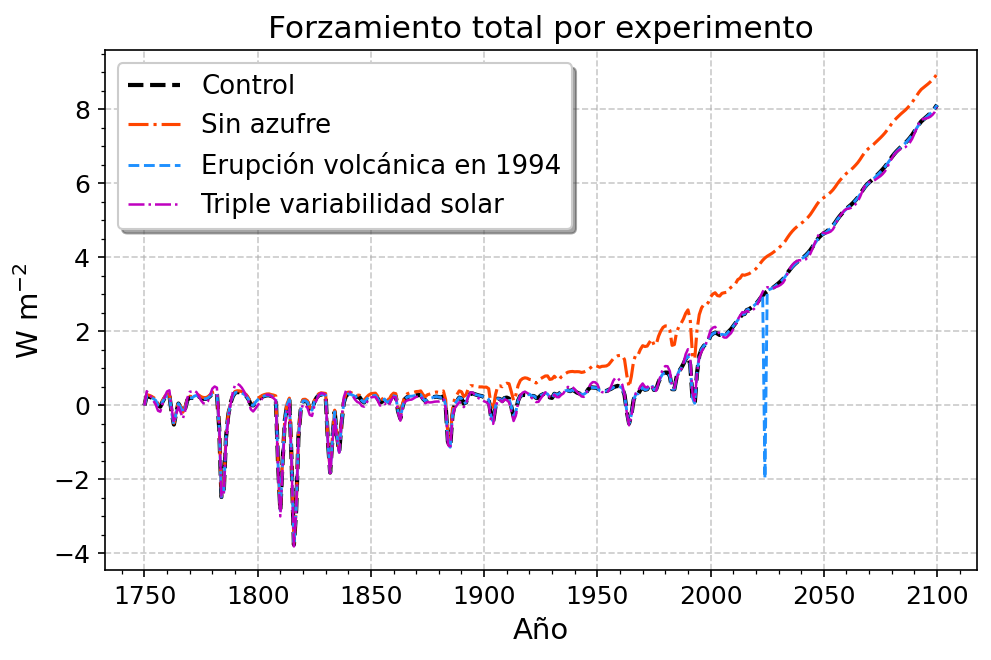

In [46]:
plt.figure(figsize=(7.5,4.5),dpi=150)
plt.plot(f.timebounds, f.forcing_sum.loc[dict(config=model_name)], label='Control',linestyle='--',c='k',linewidth=2);
plt.plot(f2.timebounds, f2.forcing_sum.loc[dict(config=model_name)], label='Sin azufre',linestyle='-.',c='orangered');
plt.plot(f3.timebounds, f3.forcing_sum.loc[dict(config=model_name)], label='Erupción volcánica en 1994',linestyle='--',linewidth=1.4,c='dodgerblue');
plt.plot(f4.timebounds, f4.forcing_sum.loc[dict(config=model_name)], label='Triple variabilidad solar',linestyle='-.',c='m',linewidth=1.2);
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento total por experimento',legend=True)

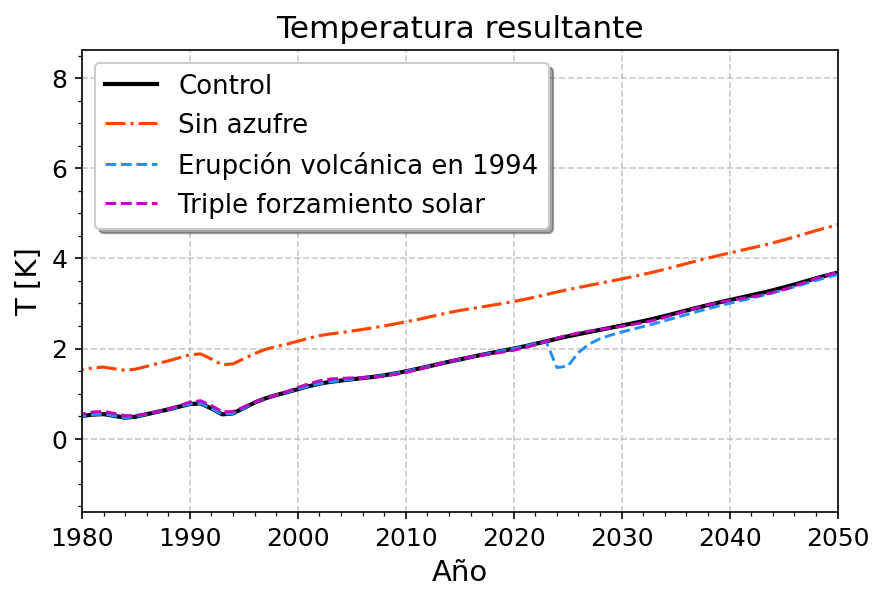

In [47]:
plt.figure(figsize=(6.5,4),dpi=150)
plt.plot(f.timebounds, f.temperature.loc[dict(config=model_name,layer=0)], label='Control',linestyle='-',c='k',linewidth=2);
plt.plot(f2.timebounds, f2.temperature.loc[dict(config=model_name,layer=0)], label='Sin azufre',linestyle='-.',c='orangered');
plt.plot(f3.timebounds, f3.temperature.loc[dict(config=model_name,layer=0)], label='Erupción volcánica en 1994',linestyle='--',linewidth=1.4,c='dodgerblue');
plt.plot(f4.timebounds, f4.temperature.loc[dict(config=model_name,layer=0)], label='Triple forzamiento solar',linestyle='--',linewidth=1.4,c='m');
lineplot_setup(1980,2050,'Año','T [K]',title='Temperatura resultante',legend=True)

Técnicamente sólo modificamos la variabilidad del forzamiento solar, no la tendencia ni tampoco el valor promedio. Entonces es posible que sólo hayamos modificado la variabilidad de la temperatura. Entonces, vamos a medir la variabiliad de la temperatura en el experimento del forzamiento solar y compararla con el Control. 

In [48]:
exp4_T_std=f4.temperature.loc[dict(config=model_name,layer=0)].std()
exp1_T_std=f.temperature.loc[dict(config=model_name,layer=0)].std()
print(exp1_T_std,exp4_T_std)

<xarray.DataArray ()> Size: 8B
array(1.95876763)
Coordinates:
    config   <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
    layer    int64 8B 0 <xarray.DataArray ()> Size: 8B
array(1.95502887)
Coordinates:
    config   <U24 96B 'HadGEM3-GC31-MM_r1i1p1f3'
    layer    int64 8B 0


Estos resultados muestran que si bien, hay un aumento numérico en la desviación estándar del experimento 4 con respecto al control, ha sido un cambio mínimo. 

A partir de estos resultados podemos responder las preguntas. 

1. ¿Qué tan relevante es el forzamiento solar comparado al forzamiento por aerosoles o por GEIs? ¿Qué pasa si triplicamos la magnitud del forzamiento solar en un escenario? ¿Qué efectos espera en la temperatura?

- En la primer gráfica, de este ejercicio, vimos que el forzamiento solar tiene una magnitud máxima de entre 0.2 y 0.3 W m${-1}$. Por otro lado, a lo largo de este notebook vimos que el forzamiento por aerosoles es de casi -1.4 W m$^{-2}$ a mediados de siglo y en los GEIs de hasta 7 W m$^{-2}$. Tan sólo el forzamiento por CO$_2$ supera 5 W m$^{-2}$ a finales de siglo.
- Después de triplicar la magnitud de la variabilidad solar, las gráficas de temperatura no mostraron cambios perceptibles en la simulación de la temperatura. Además, el cálculo de la desviación estándar de la temperatura mostró que triplicar la variabilidad solar apenas y modifica, en el orden de milésimas, la variabiliad de la temperatura. 
- A partir de estos puntos anteriores se puede concluir que la variabilidad solar es muy pequeña para influenciar la temperatura global **considerando** el tamaño del forzamiento antropogénico actual. Es decir, ante la magnitud del forzamiento por CO$_2$, el forzamiento solar aparece minúsculo. La variabilidad de la temperatura y su tendencia están dominadas por el forzamiento por GEIs y en menor grado por el forzamiento por aerosoles. 

## **<font color="ForestGreen"> Ejercicio 4: el dióxido de carbono versus el metano </font>**

Frecuentemente escuchamos que el metano y el dióxido de carbono son gases muy importantes a considerar con respecto al cambio climático. Pero ¿cuál es más importante y por qué?

Esta última pregunta no termina no termina por quedar clara. Este ejercicio busca entender los efectos que tiene la disminución de emisiones de CO2 versus CH4. Para esto vamos a realizar diferentes experimentos con el fin de medir el impacto que tendría disminuir las emisiones de un gas comparado con el otro. 

### Descripción del ejercicio

- Utilice un modelo diferente, ya no HadGEM3, escoja cualquier otro. 
- Realice 3 simulaciones con dos escenarios (en total son 6 simulaciones). 
- Los escenarios son el ssp585 y el ssp460. 
- Habrá tres simulaciones. Una será la simulación control para cada escenario, que utilizará los parámetros por default del escenario. En la segunda simulación deberán modificar las emisiones de metano de alguna manera que usted considere pertinente para los objetivos del ejercicio. En la tercer simulación deberán disminuir las emisiones de CO2.

Sus decisiones para los experimentos 2 y 3 definirán el peso que tendrán sus conclusiones e interpretaciones.  

### Gráficas a mostrar como resultados
 
 - 3 gráficas, como en los ejercicios previos, con nombres en los ejes y chulas y bonitas. 
     - Forzamiento radiativo. 
     - Anomalía de temperatura 
     - El desbalance radiativo en el tope de la atmósfera. (TOA)
 
     
### Preguntas

Al final del notebook del ejercicio conteste. 

- Describa las diferencias entre las 6 simulaciones. ¿Qué sucede con el forzamiento y la temperatura en cada una? No se olvide de sus simulaciones control. 
- Entonces qué es más importante, ¿disminuir a 0 las emisiones de metano o disminuir a la mitad las emisiones de CO2?
- Su respuesta depende del escenario considerado, ¿sí o no?
- Al final de alguna de sus simulaciones, ¿el balance radiativo en el tope de la atmósfera llega a un balance? ¿Esto es lo que esperaría? ¿por qué?

In [49]:
f5 = FAIR()
f5.define_time(1750, 2100, 1)
scenarios = [ 'ssp585', 'ssp460']

f5.define_scenarios(scenarios)
f5.define_species(species, properties)

In [50]:
print(df.model.unique())

['CAMS-CSM1-0' 'GISS-E2-2-G' 'NorESM2-LM' 'ACCESS-ESM1-5'
 'HadGEM3-GC31-LL' 'CESM2' 'NorCPM1' 'CIESM' 'INM-CM4-8' 'CNRM-CM6-1-HR'
 'CESM2-WACCM' 'CAS-ESM2-0' 'EC-Earth3-Veg' 'MPI-ESM1-2-HR'
 'MPI-ESM1-2-LR' 'GISS-E2-1-G' 'CNRM-CM6-1' 'GISS-E2-1-H' 'CMCC-CM2-SR5'
 'MRI-ESM2-0' 'SAM0-UNICON' 'EC-Earth3' 'IPSL-CM6A-LR' 'CESM2-FV2'
 'BCC-CSM2-MR' 'ACCESS-CM2' 'MIROC6' 'FIO-ESM-2-0' 'CESM2-WACCM-FV2'
 'BCC-ESM1' 'MPI-ESM-1-2-HAM' 'KACE-1-0-G' 'GFDL-ESM4' 'UKESM1-0-LL'
 'E3SM-1-0' 'KIOST-ESM' 'IITM-ESM' 'GFDL-CM4' 'CanESM5' 'AWI-CM-1-1-MR'
 'INM-CM5-0' 'FGOALS-f3-L' 'FGOALS-g3' 'CNRM-ESM2-1' 'TaiESM1'
 'NorESM2-MM' 'HadGEM3-GC31-MM' 'NESM3' 'MIROC-ES2L']


In [51]:
# Cargamos datos existentes ya en el paquete, para eso tenemos que saber donde esta el paquete fair en nuestro OS
df = pd.read_csv("4xCO2_cummins_ebm3.csv")
models = ['UKESM1-0-LL']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")

print(configs)

['UKESM1-0-LL_r1i1p1f2']


In [52]:
f5.define_configs(configs)
f5.allocate()
f5.fill_species_configs()
f5.fill_from_rcmip()

In [53]:
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f5.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f5.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f5.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [54]:
# paso 8b
initialise(f5.concentration, f5.species_configs['baseline_concentration'])
initialise(f5.forcing, 0)
initialise(f5.temperature, 0)
initialise(f5.cumulative_emissions, 0)
initialise(f5.airborne_emissions, 0)

In [55]:
f5.run()

Running 2 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

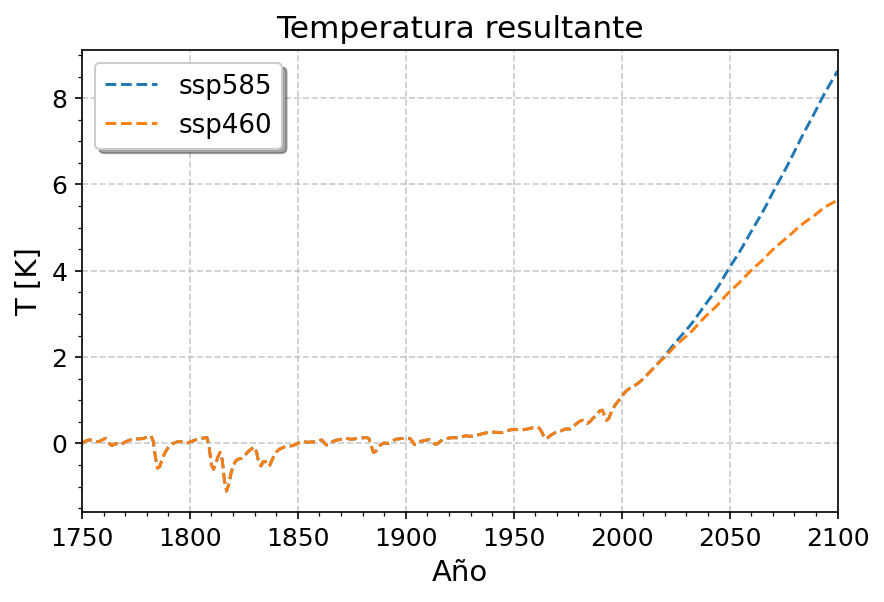

In [56]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'UKESM1-0-LL_r1i1p1f2'
plt.plot(f5.timebounds, f5.temperature.loc[dict(config=model_name,layer=0)], label=f5.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','T [K]',title='Temperatura resultante',legend=True)

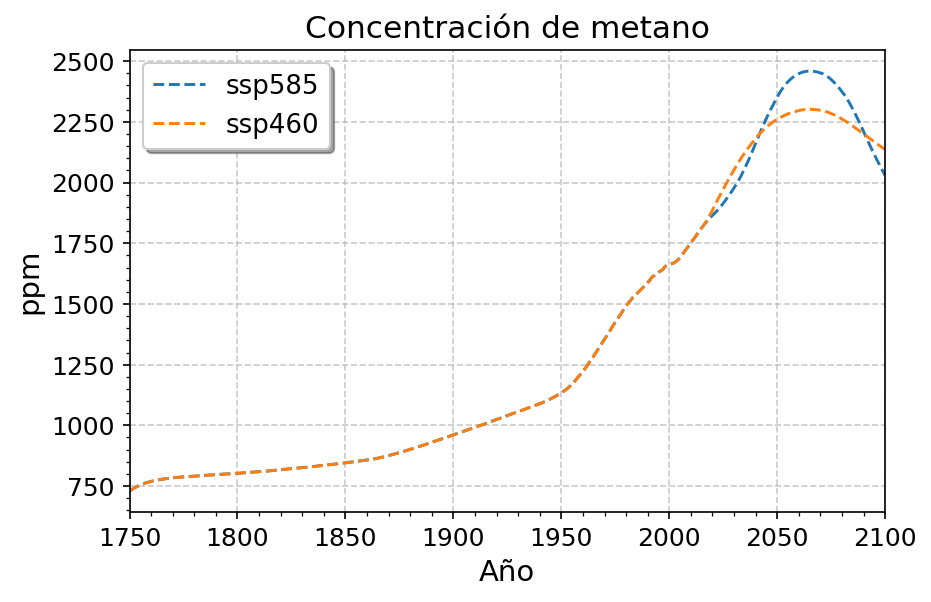

In [57]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'UKESM1-0-LL_r1i1p1f2'
plt.plot(f5.timebounds, f5.concentration.loc[dict(config=model_name,specie='CH4')], label=f5.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Concentración de metano',legend=True)

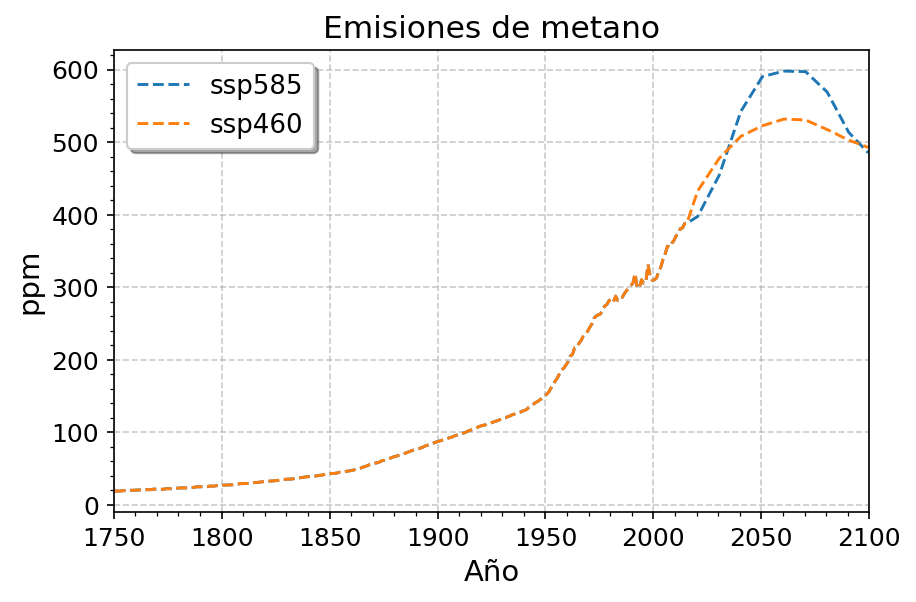

In [58]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'UKESM1-0-LL_r1i1p1f2'
plt.plot(f5.timepoints, f5.emissions.loc[dict(config=model_name,specie='CH4')], label=f5.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de metano',legend=True)

In [59]:
f6 = FAIR()
f6.define_time(1750, 2100, 1)
scenarios = [ 'ssp585', 'ssp460']
f6.define_scenarios(scenarios)
f6.define_species(species, properties)
f6.define_configs(configs)
f6.allocate()
f6.fill_species_configs()
f6.fill_from_rcmip()

In [60]:
f6.emissions.loc[dict(config=model_name,specie='CH4', timepoints=slice(2024,2100))]=0.0

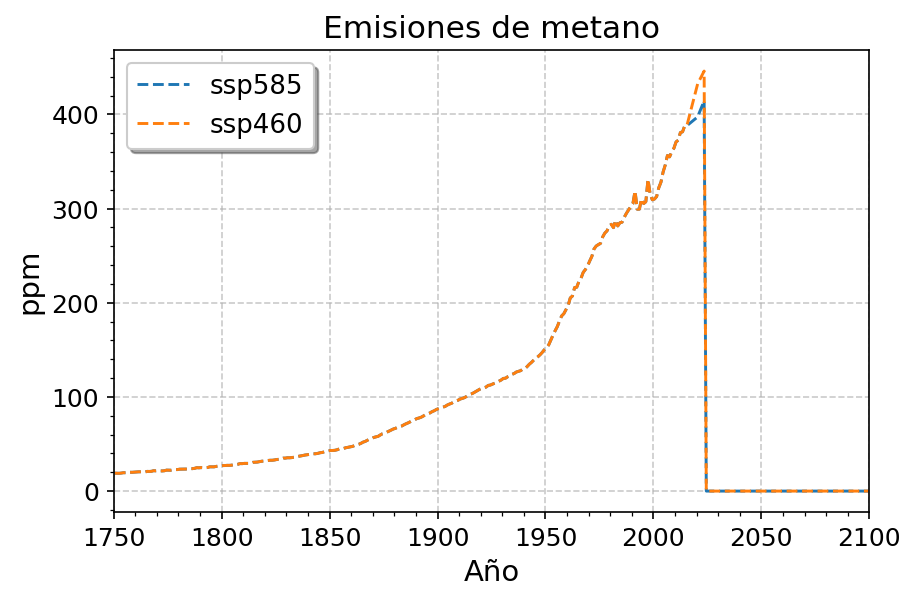

In [61]:
plt.figure(figsize=(6.5,4),dpi=150)
plt.plot(f6.timepoints, f6.emissions.loc[dict(config=model_name,specie='CH4')], label=f6.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de metano',legend=True)

In [62]:
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f6.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f6.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f6.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [63]:
# paso 8b
initialise(f6.concentration, f6.species_configs['baseline_concentration'])
initialise(f6.forcing, 0)
initialise(f6.temperature, 0)
initialise(f6.cumulative_emissions, 0)
initialise(f6.airborne_emissions, 0)

In [64]:
f6.run()

Running 2 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

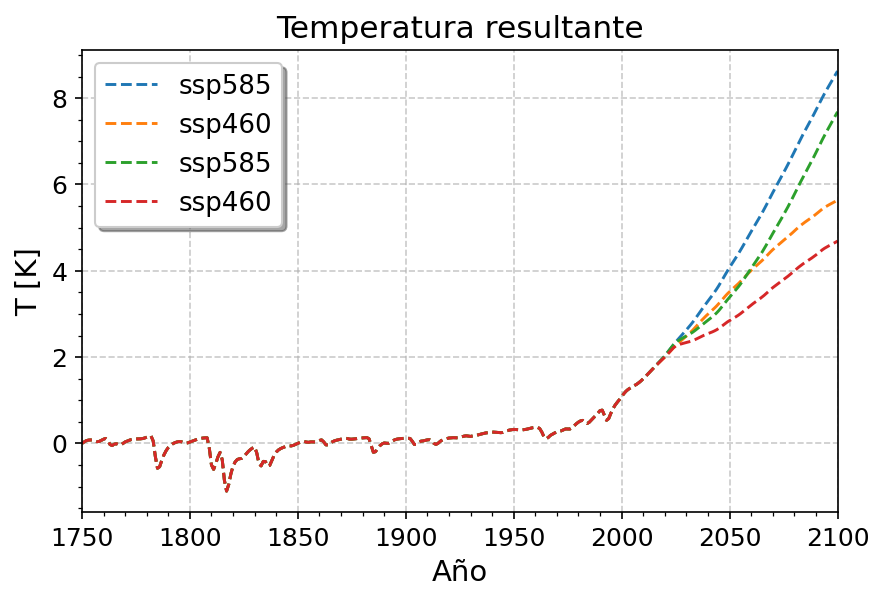

In [65]:
plt.figure(figsize=(6.5,4),dpi=150)
plt.plot(f5.timebounds, f5.temperature.loc[dict(config=model_name,layer=0)], label=f5.scenarios,linestyle='--',linewidth=1.4);
plt.plot(f6.timebounds, f6.temperature.loc[dict(config=model_name,layer=0)], label=f6.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','T [K]',title='Temperatura resultante',legend=True)
#el control tiene metano entonces es más caliente, mayor forzamiento 

In [66]:
f7 = FAIR()
f7.define_time(1750, 2100, 1)
scenarios = [ 'ssp585', 'ssp460']
f7.define_scenarios(scenarios)
f7.define_species(species, properties)
f7.define_configs(configs)
f7.allocate()
f7.fill_species_configs()
f7.fill_from_rcmip()

In [67]:
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f7.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f7.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f7.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [68]:
initialise(f7.concentration, f6.species_configs['baseline_concentration'])
initialise(f7.forcing, 0)
initialise(f7.temperature, 0)
initialise(f7.cumulative_emissions, 0)
initialise(f7.airborne_emissions, 0)

In [69]:
f7.run()

Running 2 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

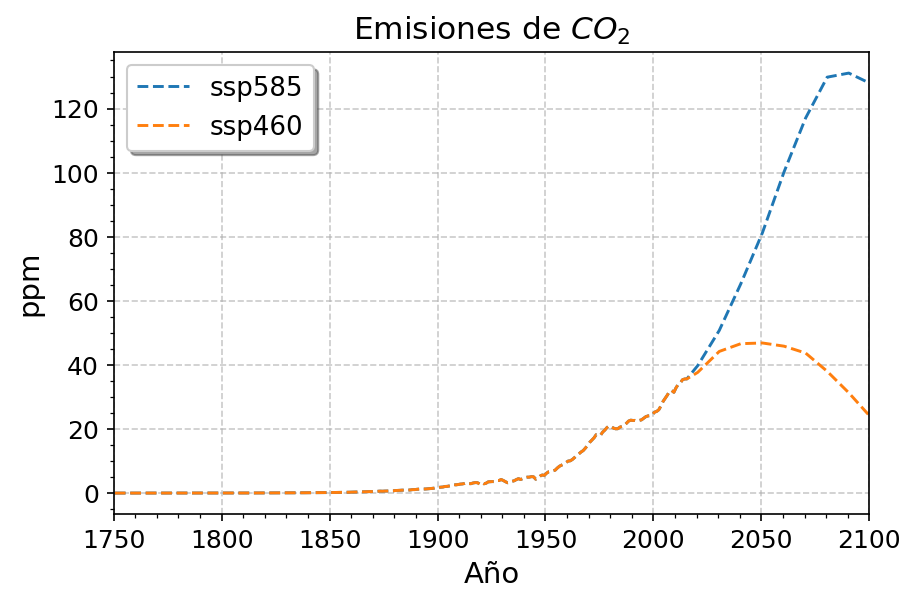

In [70]:
plt.figure(figsize=(6.5,4),dpi=150)
plt.plot(f7.timepoints, f7.emissions.loc[dict(config=model_name,specie='CO2 FFI')], label=f7.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de $CO_{2}$',legend=True)

In [71]:
#np.linspace
#np.linspace(0,0)
f7.emissions.loc[dict(config=model_name,specie='CO2 FFI', timepoints=2024.5)] #aquí se ven los puntos 

<xarray.DataArray (scenario: 2)> Size: 16B
array([44.15748168, 40.28312137])
Coordinates:
    timepoints  float64 8B 2.024e+03
  * scenario    (scenario) <U6 48B 'ssp585' 'ssp460'
    config      <U20 80B 'UKESM1-0-LL_r1i1p1f2'
    specie      <U43 172B 'CO2 FFI'

In [72]:
len(f7.emissions.loc[dict(timepoints=slice(2024,2100))])

76

In [73]:
emisiones_ssp585= np.linspace(44.15748168, 0, 76) 
emisiones_ssp460= np.linspace(40.28312137, 0, 76)

In [74]:
f7.emissions.loc[dict(config=model_name,specie='CO2 FFI', timepoints=slice(2024,2100), scenario='ssp460')]=emisiones_ssp460
f7.emissions.loc[dict(config=model_name,specie='CO2 FFI', timepoints=slice(2024,2100), scenario='ssp585')]=emisiones_ssp585

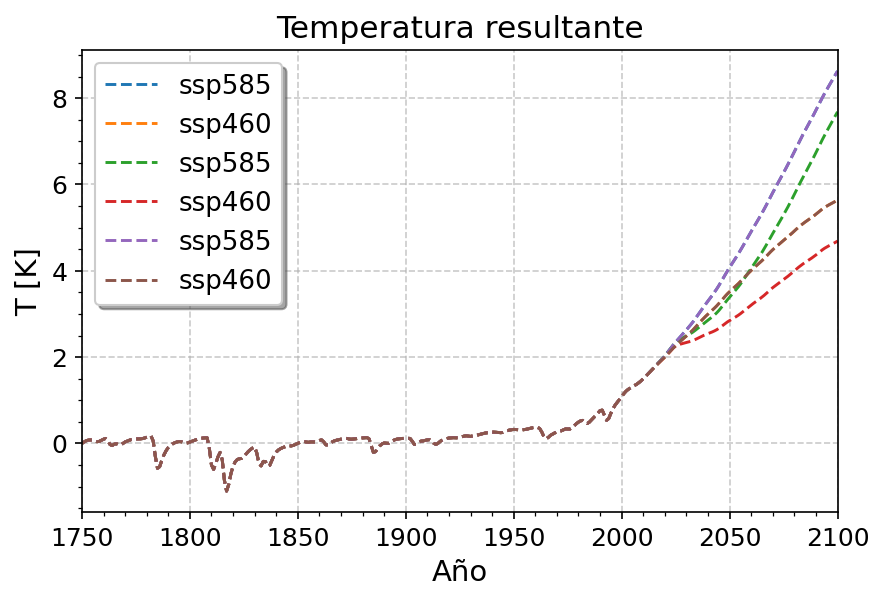

In [75]:
plt.figure(figsize=(6.5,4),dpi=150)
plt.plot(f5.timebounds, f5.temperature.loc[dict(config=model_name,layer=0)], label=f5.scenarios,linestyle='--',linewidth=1.4);
plt.plot(f6.timebounds, f6.temperature.loc[dict(config=model_name,layer=0)], label=f6.scenarios,linestyle='--',linewidth=1.4);
plt.plot(f7.timebounds, f7.temperature.loc[dict(config=model_name,layer=0)], label=f7.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','T [K]',title='Temperatura resultante',legend=True)

## **<font color="ForestGreen"> Ejercicio 5:  el escenario modificado </font>**

En este nuevo ejercicio ahora intentaremos modificar nuestros experimentos en un intervalo de tiempo específico. El objetivo es aprender a modificar escenarios pre-existentes y modificarlos en pe 

- Utilizaremos sólo un escenario, el ssp370.
- Sólo un modelo, puede usar el que sea. 
- 4 simulaciones en total. 
    - Control
    - Emisiones disminuyendo linealmente a partir de 2014 y llegando cero de CO2 en el año 2060. 
    - Sin emisiones de aerosoles por azufre y carbono negro, después de 2014. 
    - Sin los CFCs más importantes, a partir del año 1980. 
    

- Para el experimento 3, necesita modificar las emisiones de azufre y carbono negro (Sulfur y BC) al mismo tiempo.

- Experimento 4: primero tiene que encontrar los 4 CFCs (CFCs y HCFCs) con mayor emisión total entre 1980 y 2000. La emisión de estos 4, y sólo estos 4, tiene que ser 0 a partir del año 1980. 

### Gráficas a mostrar como resultados

Series de tiempo (las 4 simulaciones dentro de la misma gráfica):

1. Emisiones de todos los CFCs y HCFCs. 
2. Forzamiento radiativo únicamente por ozono. 
3. Forzamiento radiativo total. 
4. Temperatura. 
5. Cambio en el contenido de calor del océano. 

### Preguntas

Al final del notebook del ejercicio conteste. 


1. ¿Todos los CFCs se emiten al mismo tiempo y en la misma magnitud según este escenario? ¿En qué período se emitieron más CFCs?
2. ¿Cómo cambia el forzamiento por ozono cuando variamos las emisiones de CFCs de este modo? Interprete físicamente sus resultados. 
3. ¿Qué pasa si disminuimos las emisiones de aerosoles? Calcule cuál es el calentamiento extra causado por dejar de emitir aerosoles explicítamente, i.e., la diferencia de temperatura en 2100 entre la simulación 3 y el experimento Control. ¿Esto es mucho o poco?
4. Ahora considere el experimento 2, 
    4a. qué sucede con el forzamiento después de que hicimos 0 las concentraciones de CO2 ¿se equilibra? ¿por qué sucede esto? 
    4b. ¿Y para la temperatura qué sucede? ¿Sigue aumentando? Calcule la diferencia de temperatura entre este experimento y el control. 
5. Ahora considere lo que sucede en el océano, describa qué sucede con el intercambio de energía entre la atmósfera y el océano en este escenario según su gráfica. Después explique detalladammente su resultado para el experimento 2. ¿Si las emisiones de CO2 son 0, por qué el océano sigue absorbiendo calor? Recuerde sus resultados del ejercicio anterior, i.e., el desbalance radiativo. 

In [76]:
f8 = FAIR()
f8.define_time(1750, 2100, 1)
scenarios = [ 'ssp370']
f8.define_scenarios(scenarios)
f8.define_species(species, properties)

models = ['MIROC-ES2L']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")

f8.define_configs(configs)
f8.allocate()
f8.fill_species_configs()
f8.fill_from_rcmip()

for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f8.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f8.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f8.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [77]:
initialise(f8.concentration, f8.species_configs['baseline_concentration'])
initialise(f8.forcing, 0)
initialise(f8.temperature, 0)
initialise(f8.cumulative_emissions, 0)
initialise(f8.airborne_emissions, 0)

In [78]:
f8.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

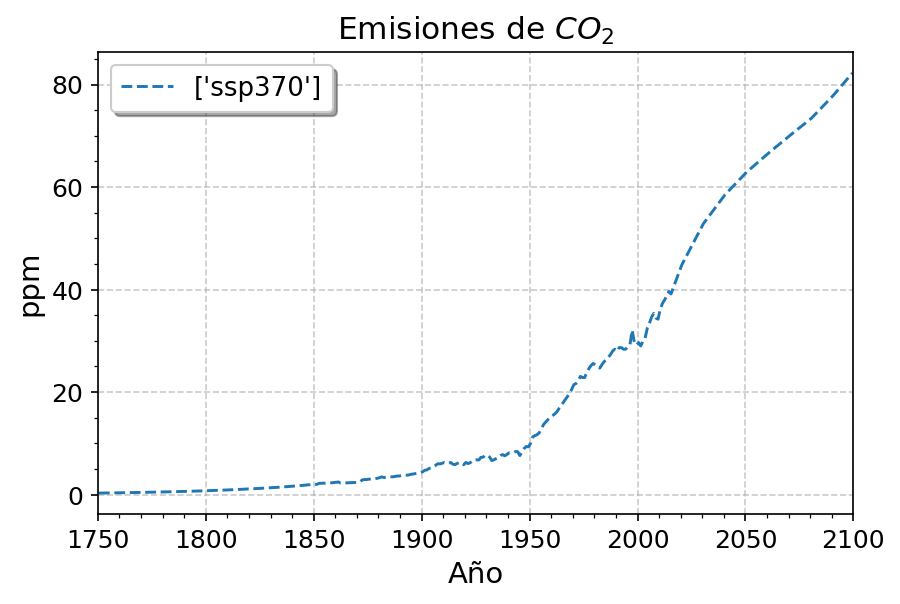

In [79]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f8.timepoints, f8.emissions.loc[dict(config=model_name,specie='CO2')], label=f8.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de $CO_{2}$',legend=True)

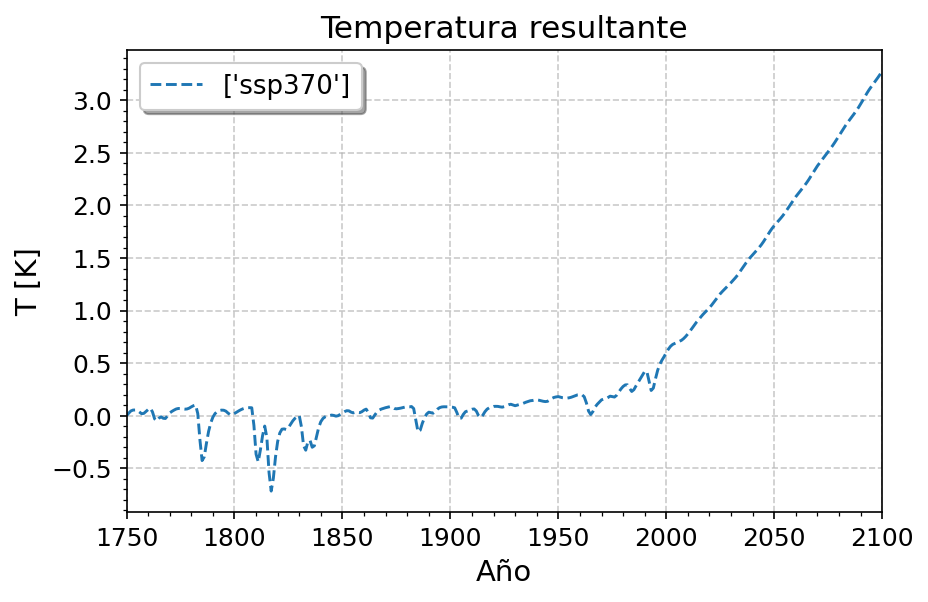

In [80]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f8.timebounds, f8.temperature.loc[dict(config=model_name,layer=0)], label=f8.scenarios,linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','T [K]',title='Temperatura resultante',legend=True)

In [81]:
f8.temperature

<xarray.DataArray (timebounds: 351, scenario: 1, config: 1, layer: 3)> Size: 8kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]],


       [[[2.37512784e-02, 1.29191140e-03, 5.64607773e-07]]],


       [[[4.49106462e-02, 5.64770695e-03, 5.55877297e-06]]],


       ...,


       [[[3.21634402e+00, 2.87359887e+00, 2.31757376e-01]]],


       [[[3.24631697e+00, 2.90270323e+00, 2.35797724e-01]]],


       [[[3.27859767e+00, 2.93190601e+00, 2.39876229e-01]]]])
Coordinates:
  * timebounds  (timebounds) float64 3kB 1.75e+03 1.751e+03 ... 2.1e+03
  * scenario    (scenario) <U6 24B 'ssp370'
  * config      (config) <U19 76B 'MIROC-ES2L_r1i1p1f2'
  * layer       (layer) int64 24B 0 1 2

In [105]:
def temp(Tar):
    list1= [ ]
    list2= [ ]
    for T in  Tar:
        if T >= 1.5:
            list1.append(T.timebounds)
        if T >= 2.0:
            list2.append(T.timebounds)
    return list1[0], list2[0]

In [106]:
temp(f8.temperature.loc[dict(config=model_name,layer=0)])

(<xarray.DataArray 'timebounds' ()> Size: 8B
 array(2039.)
 Coordinates:
     timebounds  float64 8B 2.039e+03
     config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
     layer       int64 8B 0,
 <xarray.DataArray 'timebounds' ()> Size: 8B
 array(2058.)
 Coordinates:
     timebounds  float64 8B 2.058e+03
     config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
     layer       int64 8B 0)

In [84]:
for T in  f8.temperature.loc[dict(config=model_name,layer=0)]:
    if 1.5 <= T <= 1.52:
        print(T.timebounds)
    if 2.0 <= T <= 2.05:
        print(T.timebounds)

<xarray.DataArray 'timebounds' ()> Size: 8B
array(2039.)
Coordinates:
    timebounds  float64 8B 2.039e+03
    config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
    layer       int64 8B 0
<xarray.DataArray 'timebounds' ()> Size: 8B
array(2058.)
Coordinates:
    timebounds  float64 8B 2.058e+03
    config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
    layer       int64 8B 0


In [107]:
f8.scenarios

['ssp370']

In [85]:
f9 = FAIR()
f9.define_time(1750, 2100, 1)
scenarios = [ 'ssp370']
f9.define_scenarios(scenarios)
f9.define_species(species, properties)

models = ['MIROC-ES2L']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")

f9.define_configs(configs)
f9.allocate()
f9.fill_species_configs()
f9.fill_from_rcmip()

for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f9.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f9.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f9.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [86]:
initialise(f9.concentration, f9.species_configs['baseline_concentration'])
initialise(f9.forcing, 0)
initialise(f9.temperature, 0)
initialise(f9.cumulative_emissions, 0)
initialise(f9.airborne_emissions, 0)

In [87]:
f9.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

In [88]:
f9.emissions.loc[dict(config=model_name,specie='CO2', timepoints=2014.5)]

<xarray.DataArray (scenario: 1)> Size: 8B
array([39.63094805])
Coordinates:
    timepoints  float64 8B 2.014e+03
  * scenario    (scenario) <U6 24B 'ssp370'
    config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
    specie      <U43 172B 'CO2'

In [89]:
emisiones_ssp370= np.linspace(39.63094805, 0, 46)

In [90]:
f9.emissions.loc[dict(config=model_name,specie='CO2', timepoints=slice(2014,2060), scenario='ssp370')]=emisiones_ssp370
f9.emissions.loc[dict(config=model_name,specie='CO2', timepoints=slice(2060,2100), scenario='ssp370')]=0

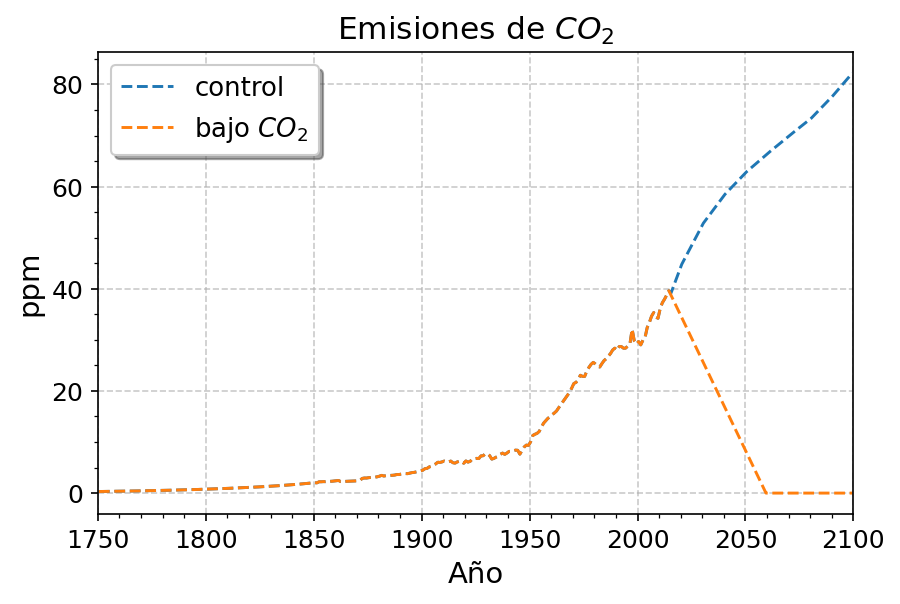

In [91]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f8.timepoints, f8.emissions.loc[dict(config=model_name,specie='CO2')], label='control',linestyle='--',linewidth=1.4);
plt.plot(f9.timepoints, f9.emissions.loc[dict(config=model_name,specie='CO2')], label='bajo $CO_{2}$',linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de $CO_{2}$',legend=True)

In [92]:
f10 = FAIR()
f10.define_time(1750, 2100, 1)
scenarios = [ 'ssp370']
f10.define_scenarios(scenarios)
f10.define_species(species, properties)

models = ['MIROC-ES2L']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")

f10.define_configs(configs)
f10.allocate()
f10.fill_species_configs()
f10.fill_from_rcmip()

for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f10.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f10.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f10.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [93]:
initialise(f10.concentration, f10.species_configs['baseline_concentration'])
initialise(f10.forcing, 0)
initialise(f10.temperature, 0)
initialise(f10.cumulative_emissions, 0)
initialise(f10.airborne_emissions, 0)

In [94]:
f10.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

In [95]:
f10.emissions.loc[dict(config=model_name,specie='Sulfur', timepoints=2014.5)]

<xarray.DataArray (scenario: 1)> Size: 8B
array([114.0086622])
Coordinates:
    timepoints  float64 8B 2.014e+03
  * scenario    (scenario) <U6 24B 'ssp370'
    config      <U19 76B 'MIROC-ES2L_r1i1p1f2'
    specie      <U43 172B 'Sulfur'

In [96]:
f10.emissions.loc[dict(config=model_name,specie=['Sulfur', 'BC'], timepoints=slice(2014,2100), scenario='ssp370')]=0

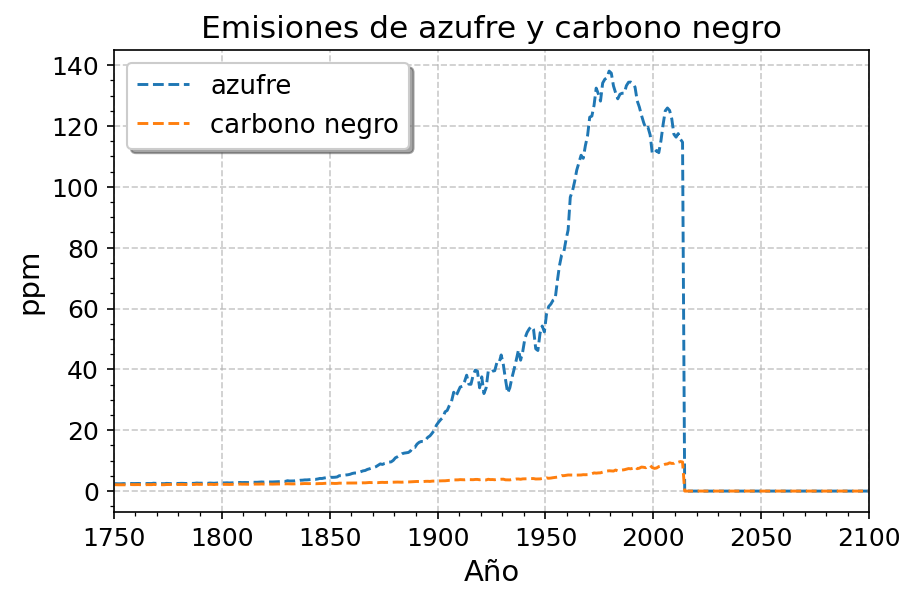

In [97]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f10.timepoints, f10.emissions.loc[dict(config=model_name,specie='Sulfur')], label='azufre',linestyle='--',linewidth=1.4);
plt.plot(f10.timepoints, f10.emissions.loc[dict(config=model_name,specie='BC')], label='carbono negro',linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de azufre y carbono negro',legend=True)

In [98]:
f11 = FAIR()
f11.define_time(1750, 2100, 1)
scenarios = [ 'ssp370']
f11.define_scenarios(scenarios)
f11.define_species(species, properties)

models = ['MIROC-ES2L']
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")

f11.define_configs(configs)
f11.allocate()
f11.fill_species_configs()
f11.fill_from_rcmip()

for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f11.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f11.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f11.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)

In [99]:
initialise(f11.concentration, f10.species_configs['baseline_concentration'])
initialise(f11.forcing, 0)
initialise(f11.temperature, 0)
initialise(f11.cumulative_emissions, 0)
initialise(f11.airborne_emissions, 0)

In [100]:
f11.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

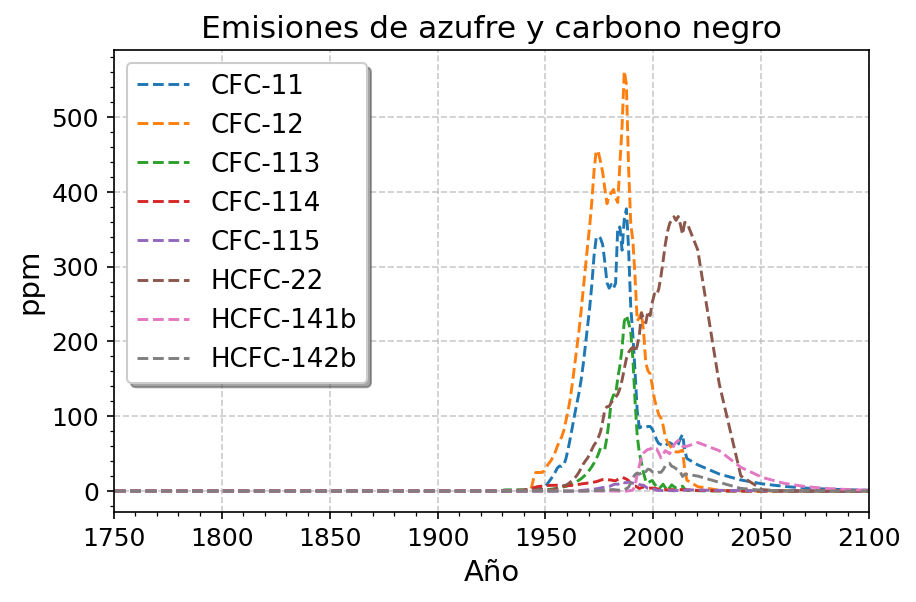

In [101]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-11')], label='CFC-11',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-12')], label='CFC-12',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-113')], label='CFC-113',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-114')], label='CFC-114',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-115')], label='CFC-115',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='HCFC-22')], label='HCFC-22',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='HCFC-141b')], label='HCFC-141b',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='HCFC-142b')], label='HCFC-142b',linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de azufre y carbono negro',legend=True)

In [102]:
f11.emissions.loc[dict(config=model_name,specie=['CFC-11', 'CFC-12', 'CFC-113', 'HCFC-22'], timepoints=slice(1980,2100), scenario='ssp370')]=0

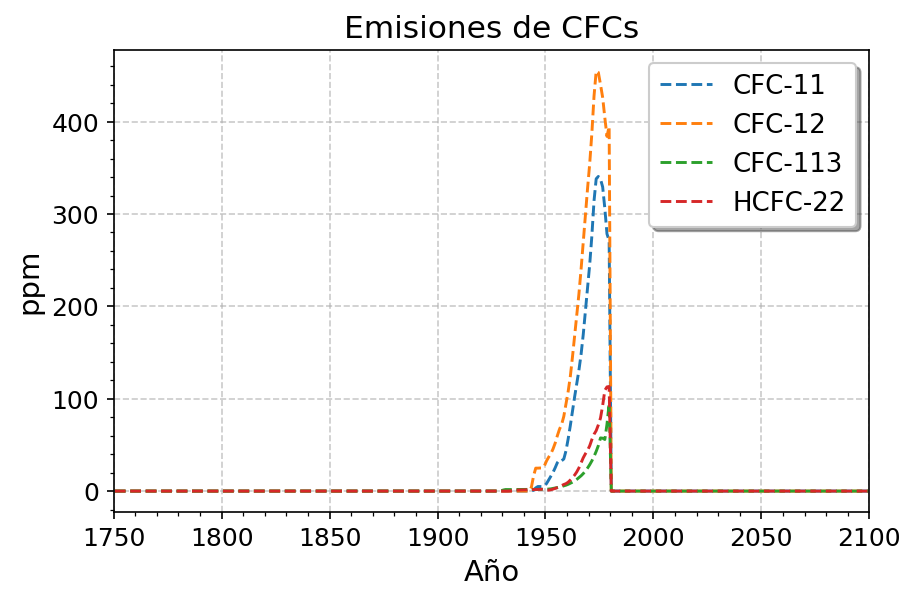

In [103]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-11')], label='CFC-11',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-12')], label='CFC-12',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='CFC-113')], label='CFC-113',linestyle='--',linewidth=1.4);
plt.plot(f11.timepoints, f11.emissions.loc[dict(config=model_name,specie='HCFC-22')], label='HCFC-22',linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de CFCs',legend=True)

In [104]:
plt.plot(f.timebounds,f.forcing.loc[dict(specie='V',config=model_name)].squeeze(),label='Control',linestyle='-',c='k',linewidth=2)
lineplot_setup(None,None,'Año','W m$^{-2}$',title='Forzamiento volcánico',legend=False)

KeyError: "not all values found in index 'specie'. Try setting the `method` keyword argument (example: method='nearest')."

In [ ]:
sim11 = f11.emissions.loc[dict(config=model_name,specie=['CFC-11','CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b',])].sum('specie')
sim10 = f10.emissions.loc[dict(config=model_name,specie=['CFC-11','CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b',])].sum('specie')
sim9 = f9.emissions.loc[dict(config=model_name,specie=['CFC-11','CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b',])].sum('specie')
sim8 = f8.emissions.loc[dict(config=model_name,specie=['CFC-11','CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b',])].sum('specie')

In [ ]:
plt.figure(figsize=(6.5,4),dpi=150)
model_name= 'MIROC-ES2L_r1i1p1f2'
plt.plot(f11.timepoints, sim11, label='CFC f11',linestyle='--',linewidth=1.4);
plt.plot(f10.timepoints, sim10, label='CFC f10',linestyle='--',linewidth=1.4);
plt.plot(f9.timepoints, sim9, label='CFC f9',linestyle='--',linewidth=1.4);
plt.plot(f8.timepoints,sim8, label='HCFC f8',linestyle='--',linewidth=1.4);
lineplot_setup(1750,2100,'Año','ppm',title='Emisiones de CFCs',legend=True)